In [ ]:
!pip install geostatspy

In [ ]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python

In [ ]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import scipy.signal as signal             # kernel for moving window calculation
import random                             # for randon numbers
import seaborn as sns                     # for matrix scatter plots
from sklearn.impute import SimpleImputer  # basic imputation method
from sklearn.impute import KNNImputer     # k-nearest neighbour imputation method
from sklearn.experimental import enable_iterative_imputer # required for MICE imputation
from sklearn.impute import IterativeImputer # MICE imputation
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv(r'/content/HackathonData2024.csv')
# df = df.drop(['Prod'],axis = 1)

In [ ]:
df.head(n=13)

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.93,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.7,2719.898438,472.4
1,2,-8.45,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.9,2934.885325,747.4
2,3,8.70,Arches,11000,Campbell,8470.0,Orange Crush,0,101111,Middle,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.8,1589.948673,596.9
3,4,NaN,Arches,11000,Campbell,10555.0,Coke,1,11110000,Edge,...,4,0.0,0.0,1,0.501287,30,2653.539415,206.7,1304.162878,551.5
4,5,19.93,Badlands,2300,Campbell,9295.0,Mountain Dew,1,10001101,Edge,...,277,1.0,1.0,2,0.503327,336,NaN,NaN,NaN,NaN
5,6,-4.34,Big Bend,12300,Campbell,10355.0,Coke,1,11110000,Edge,...,1410,21.5,28.5,4,0.565200,21,2963.567911,232.0,2063.408619,517.8
6,7,0.54,Big Bend,12600,Campbell,8120.0,Orange Crush,1,10101111,Edge,...,177,-0.7,-1.0,3,0.561294,34,2814.617107,296.9,2330.939138,471.2
7,8,66.52,Arches,11000,Campbell,10560.0,Coke,1,11111000,Edge,...,29,-0.5,-0.5,2,0.493534,135,2697.576560,222.9,1975.744979,707.7
8,9,3.39,Big Bend,12900,Campbell,10345.0,Coke,1,11111000,Edge,...,36,0.0,0.0,1,0.560111,227,2892.427934,248.5,2235.448950,698.1
9,10,13.78,Canyonlands,10000,Campbell,8335.0,Mountain Dew,0,10001001,Middle,...,21,7.1,16.0,7,0.540762,21,2763.612613,159.2,1671.514259,287.2


Removing data

In [ ]:
proportion_NaN = 0                         # proportion of values in DataFrame to remove

remove = np.random.random(df.shape) < proportion_NaN # make the boolean array for removal
print('Fraction of removed values in mask ndarray = ' + str(round(remove.sum()/remove.size,3)) + '.')

df_mask = df.mask(remove)

print('Fraction of nan values in the DataFrame = ' + str(round(df_mask.isnull().sum().sum()/(df_mask.shape[0]*df_mask.shape[1]),3)) + '.')

Fraction of removed values in mask ndarray = 0.0.
Fraction of nan values in the DataFrame = 0.064.


In [ ]:
df_mask.head(n=13)

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.93,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.7,2719.898438,472.4
1,2,-8.45,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.9,2934.885325,747.4
2,3,8.70,Arches,11000,Campbell,8470.0,Orange Crush,0,101111,Middle,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.8,1589.948673,596.9
3,4,NaN,Arches,11000,Campbell,10555.0,Coke,1,11110000,Edge,...,4,0.0,0.0,1,0.501287,30,2653.539415,206.7,1304.162878,551.5
4,5,19.93,Badlands,2300,Campbell,9295.0,Mountain Dew,1,10001101,Edge,...,277,1.0,1.0,2,0.503327,336,NaN,NaN,NaN,NaN
5,6,-4.34,Big Bend,12300,Campbell,10355.0,Coke,1,11110000,Edge,...,1410,21.5,28.5,4,0.565200,21,2963.567911,232.0,2063.408619,517.8
6,7,0.54,Big Bend,12600,Campbell,8120.0,Orange Crush,1,10101111,Edge,...,177,-0.7,-1.0,3,0.561294,34,2814.617107,296.9,2330.939138,471.2
7,8,66.52,Arches,11000,Campbell,10560.0,Coke,1,11111000,Edge,...,29,-0.5,-0.5,2,0.493534,135,2697.576560,222.9,1975.744979,707.7
8,9,3.39,Big Bend,12900,Campbell,10345.0,Coke,1,11111000,Edge,...,36,0.0,0.0,1,0.560111,227,2892.427934,248.5,2235.448950,698.1
9,10,13.78,Canyonlands,10000,Campbell,8335.0,Mountain Dew,0,10001001,Middle,...,21,7.1,16.0,7,0.540762,21,2763.612613,159.2,1671.514259,287.2


Evalutation Data Coverage

In [ ]:
df_mask.describe().transpose().round(decimals=2)

,count,mean,std,min,25%,50%,75%,max
Well ID,348.0,180.03,103.16,1.00,91.50,180.50,269.25,356.00
Avg Pump Difference,333.0,22.46,24.33,-12.69,3.86,17.37,34.33,117.26
Lateral Length,348.0,11115.23,2408.76,2300.00,10000.00,10300.00,12700.00,18200.00
TVD,344.0,9082.37,854.26,7345.00,8340.00,8912.50,9968.75,10675.00
DELAYED,348.0,0.72,0.45,0.00,0.00,1.00,1.00,1.00
BOUND_CODE,348.0,9893037.47,2814065.05,1110.00,10001001.00,11011001.00,11111000.00,11111111.00
PARENT_CODEV_1050_WELL_COUNT,348.0,3.22,2.06,0.00,2.00,3.00,4.00,11.00
PARENT_IN_ZONE_MIN_HYPOT,259.0,1495.46,788.54,237.00,768.00,1225.00,2300.00,2854.00
PARENT_OUT_ZONE_MIN_HYPOT,318.0,1299.24,740.01,151.00,774.50,1096.00,1832.75,2925.00
PARENT_IN_ZONE_MIN_MAP_DIST,259.0,1473.72,796.65,35.00,765.00,1217.00,2292.00,2820.00


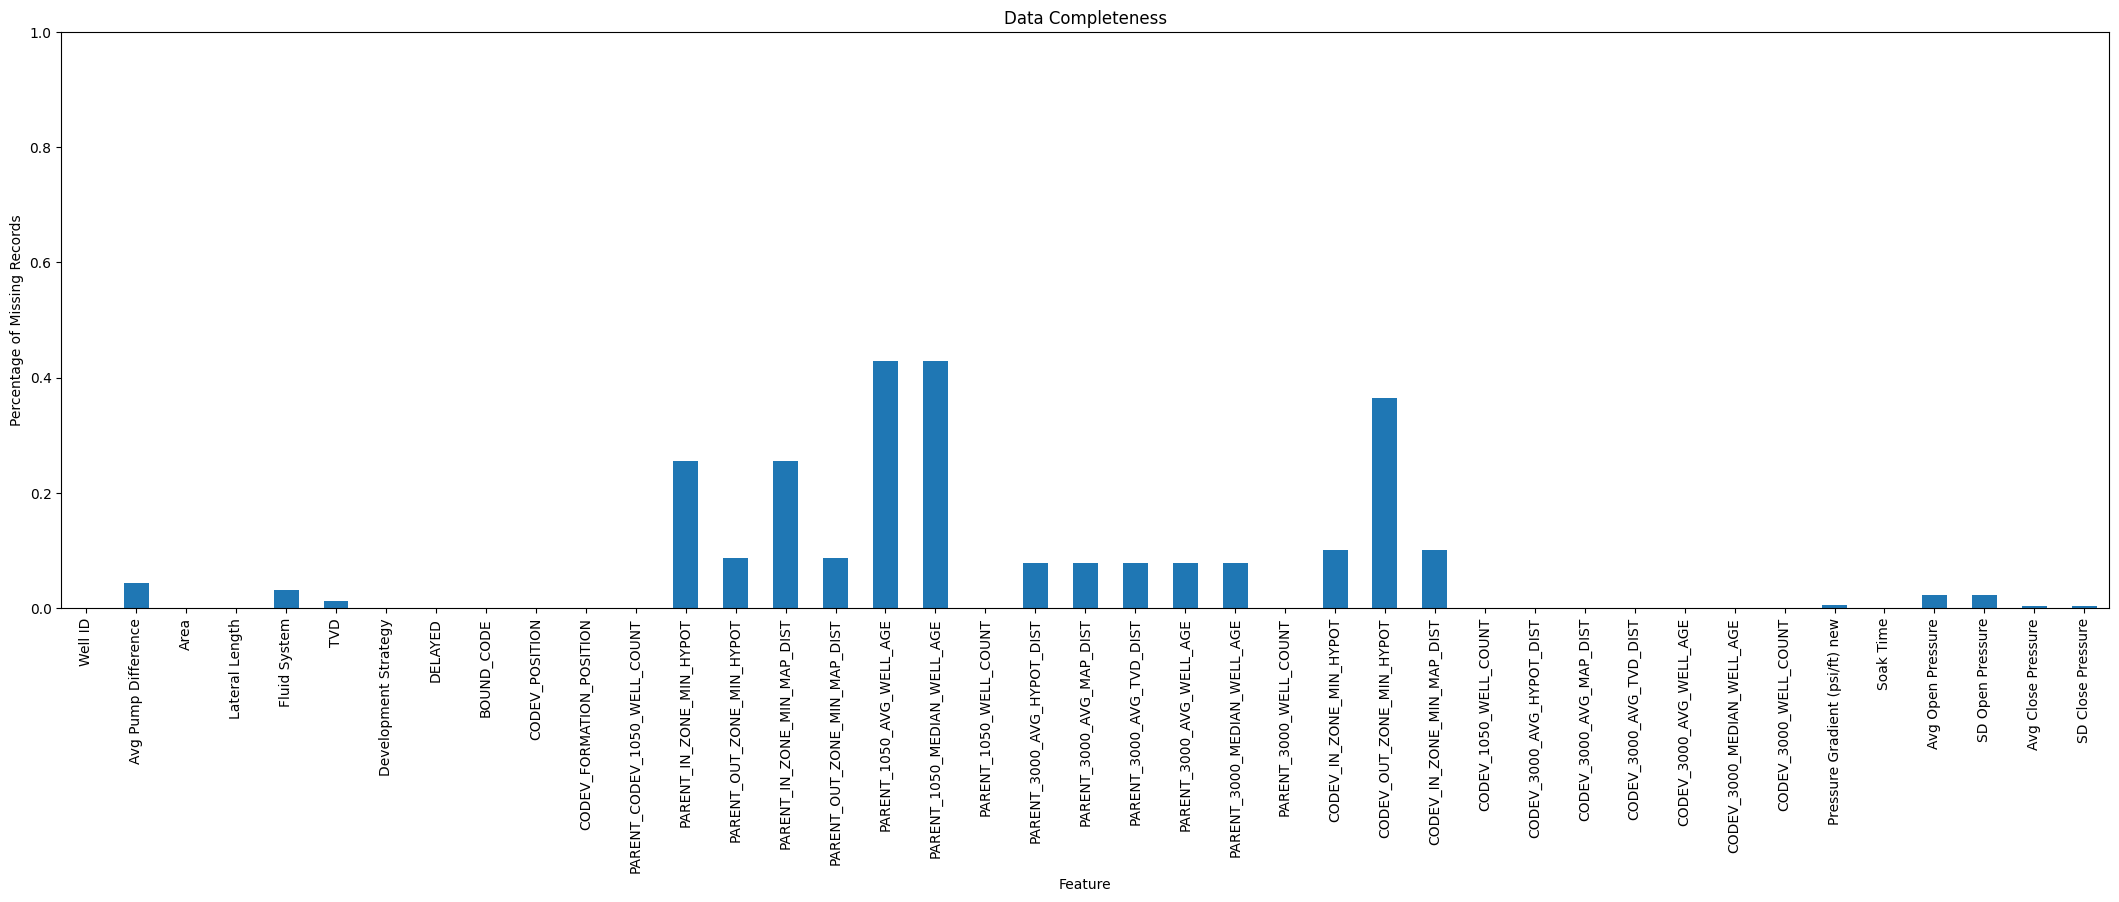

In [ ]:
(df_mask.isnull().sum()/len(df)).plot(kind = 'bar')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Records'); plt.title('Data Completeness')
plt.ylim([0,1.0])
plt.show()

**Remove the following variables**

Because of the strong percentage of missing records, we decided to remove the following features. These features could undergo imputation yet this would introduce further uncertainty.


*   PARENT_1050_AVG_WELL_AGE
*   PARENT_1050_MEDIAN_WELL_AGE
*   CODEV_OUT_ZONE_MIN_HYPOT

In [ ]:
# Specify columns to drop
columns_to_drop = ['PARENT_1050_AVG_WELL_AGE',
                   'PARENT_1050_MEDIAN_WELL_AGE',
                   'CODEV_OUT_ZONE_MIN_HYPOT']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Print or use the DataFrame as needed
df.describe()

,Well ID,Avg Pump Difference,Lateral Length,TVD,DELAYED,BOUND_CODE,PARENT_CODEV_1050_WELL_COUNT,PARENT_IN_ZONE_MIN_HYPOT,PARENT_OUT_ZONE_MIN_HYPOT,PARENT_IN_ZONE_MIN_MAP_DIST,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
count,348.000000,333.000000,348.000000,344.000000,348.000000,3.480000e+02,348.000000,259.000000,318.000000,259.000000,...,348.000000,348.000000,348.000000,348.000000,346.000000,348.000000,340.000000,340.000000,347.000000,347.000000
mean,180.034483,22.464054,11115.229885,9082.369186,0.718391,9.893037e+06,3.218391,1495.463320,1299.242138,1473.718147,...,267.962644,0.930172,1.676724,4.606322,0.533449,174.514368,2824.373050,242.944118,2267.651835,568.830836
std,103.160148,24.327237,2408.755213,854.259511,0.450431,2.814065e+06,2.062009,788.543104,740.009354,796.649370,...,312.013257,7.267537,10.175532,3.924748,0.032848,145.680723,362.277478,176.379393,531.446444,199.515030
min,1.000000,-12.690000,2300.000000,7345.000000,0.000000,1.110000e+03,0.000000,237.000000,151.000000,35.000000,...,0.000000,-34.000000,-45.000000,1.000000,0.453435,15.000000,1824.858692,105.000000,695.837930,177.600000
25%,91.500000,3.860000,10000.000000,8340.000000,0.000000,1.000100e+07,2.000000,768.000000,774.500000,765.000000,...,21.000000,0.000000,0.000000,2.000000,0.505854,55.500000,2582.143895,164.375000,1940.305787,423.650000
50%,180.500000,17.370000,10300.000000,8912.500000,1.000000,1.101100e+07,3.000000,1225.000000,1096.000000,1217.000000,...,181.500000,0.250000,0.500000,4.000000,0.531166,129.500000,2798.176541,203.900000,2324.338199,559.300000
75%,269.250000,34.330000,12700.000000,9968.750000,1.000000,1.111100e+07,4.000000,2300.000000,1832.750000,2292.000000,...,393.000000,1.825000,1.500000,6.000000,0.557539,239.000000,3091.270873,256.800000,2650.873367,686.050000
max,356.000000,117.260000,18200.000000,10675.000000,1.000000,1.111111e+07,11.000000,2854.000000,2925.000000,2820.000000,...,1639.000000,32.600000,53.000000,24.000000,0.638137,988.000000,3579.913367,2145.800000,3228.586918,1330.400000


Print data types of all features

In [ ]:
# Create a dictionary to store column names and their data types
column_data_types = {}

# Iterate through columns and store their data types
for column in df.columns:
    data_type = df[column].dtype
    column_data_types[column] = str(data_type)

# Print or use the dictionary as needed
print("Column Data Types:")
for column, data_type in column_data_types.items():
    print(f"{column}: {data_type}")

Column Data Types:
Well ID: int64
Avg Pump Difference: float64
Area: object
Lateral Length: int64
Fluid System: object
TVD: float64
Development Strategy: object
DELAYED: int64
BOUND_CODE: int64
CODEV_POSITION: object
CODEV_FORMATION_POSITION: object
PARENT_CODEV_1050_WELL_COUNT: int64
PARENT_IN_ZONE_MIN_HYPOT: float64
PARENT_OUT_ZONE_MIN_HYPOT: float64
PARENT_IN_ZONE_MIN_MAP_DIST: float64
PARENT_OUT_ZONE_MIN_MAP_DIST: float64
PARENT_1050_WELL_COUNT: int64
PARENT_3000_AVG_HYPOT_DIST: float64
PARENT_3000_AVG_MAP_DIST: float64
PARENT_3000_AVG_TVD_DIST: float64
PARENT_3000_AVG_WELL_AGE: float64
PARENT_3000_MEDIAN_WELL_AGE: float64
PARENT_3000_WELL_COUNT: int64
CODEV_IN_ZONE_MIN_HYPOT: float64
CODEV_IN_ZONE_MIN_MAP_DIST: float64
CODEV_1050_WELL_COUNT: int64
CODEV_3000_AVG_HYPOT_DIST: int64
CODEV_3000_AVG_MAP_DIST: int64
CODEV_3000_AVG_TVD_DIST: int64
CODEV_3000_AVG_WELL_AGE: float64
CODEV_3000_MEDIAN_WELL_AGE: float64
CODEV_3000_WELL_COUNT: int64
Pressure Gradient (psi/ft) new: float64
Soak

Organize dataframe into categorical and numerical

In [ ]:
# Separate columns based on data type
numerical_columns = df.select_dtypes(exclude='object')
categorical_columns = df.drop(columns=numerical_columns)

# Create DataFrames for categorical and numerical columns
categorical_df = pd.DataFrame(categorical_columns)
numerical_df = pd.DataFrame(numerical_columns)

# Print or use the resulting DataFrames as needed
print("Categorical DataFrame:")
display(categorical_df.describe())

print("\nNumerical DataFrame:")
numerical_df.describe()


Categorical DataFrame:


,Area,Fluid System,Development Strategy,CODEV_POSITION,CODEV_FORMATION_POSITION
count,348,337,348,348,348
unique,31,3,7,2,2
top,Great Basin,Campbell,Orange Crush,Edge,Edge
freq,35,197,133,224,258



Numerical DataFrame:


,Well ID,Avg Pump Difference,Lateral Length,TVD,DELAYED,BOUND_CODE,PARENT_CODEV_1050_WELL_COUNT,PARENT_IN_ZONE_MIN_HYPOT,PARENT_OUT_ZONE_MIN_HYPOT,PARENT_IN_ZONE_MIN_MAP_DIST,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
count,348.000000,333.000000,348.000000,344.000000,348.000000,3.480000e+02,348.000000,259.000000,318.000000,259.000000,...,348.000000,348.000000,348.000000,348.000000,346.000000,348.000000,340.000000,340.000000,347.000000,347.000000
mean,180.034483,22.464054,11115.229885,9082.369186,0.718391,9.893037e+06,3.218391,1495.463320,1299.242138,1473.718147,...,267.962644,0.930172,1.676724,4.606322,0.533449,174.514368,2824.373050,242.944118,2267.651835,568.830836
std,103.160148,24.327237,2408.755213,854.259511,0.450431,2.814065e+06,2.062009,788.543104,740.009354,796.649370,...,312.013257,7.267537,10.175532,3.924748,0.032848,145.680723,362.277478,176.379393,531.446444,199.515030
min,1.000000,-12.690000,2300.000000,7345.000000,0.000000,1.110000e+03,0.000000,237.000000,151.000000,35.000000,...,0.000000,-34.000000,-45.000000,1.000000,0.453435,15.000000,1824.858692,105.000000,695.837930,177.600000
25%,91.500000,3.860000,10000.000000,8340.000000,0.000000,1.000100e+07,2.000000,768.000000,774.500000,765.000000,...,21.000000,0.000000,0.000000,2.000000,0.505854,55.500000,2582.143895,164.375000,1940.305787,423.650000
50%,180.500000,17.370000,10300.000000,8912.500000,1.000000,1.101100e+07,3.000000,1225.000000,1096.000000,1217.000000,...,181.500000,0.250000,0.500000,4.000000,0.531166,129.500000,2798.176541,203.900000,2324.338199,559.300000
75%,269.250000,34.330000,12700.000000,9968.750000,1.000000,1.111100e+07,4.000000,2300.000000,1832.750000,2292.000000,...,393.000000,1.825000,1.500000,6.000000,0.557539,239.000000,3091.270873,256.800000,2650.873367,686.050000
max,356.000000,117.260000,18200.000000,10675.000000,1.000000,1.111111e+07,11.000000,2854.000000,2925.000000,2820.000000,...,1639.000000,32.600000,53.000000,24.000000,0.638137,988.000000,3579.913367,2145.800000,3228.586918,1330.400000


**Mean Imputation : Replace with the Mean**

In [ ]:
 # Replace NaN values with the average of the column
for column in numerical_df:
  df[column] = df[column].fillna(df[column].mean())

KeyError: 'Imputed'

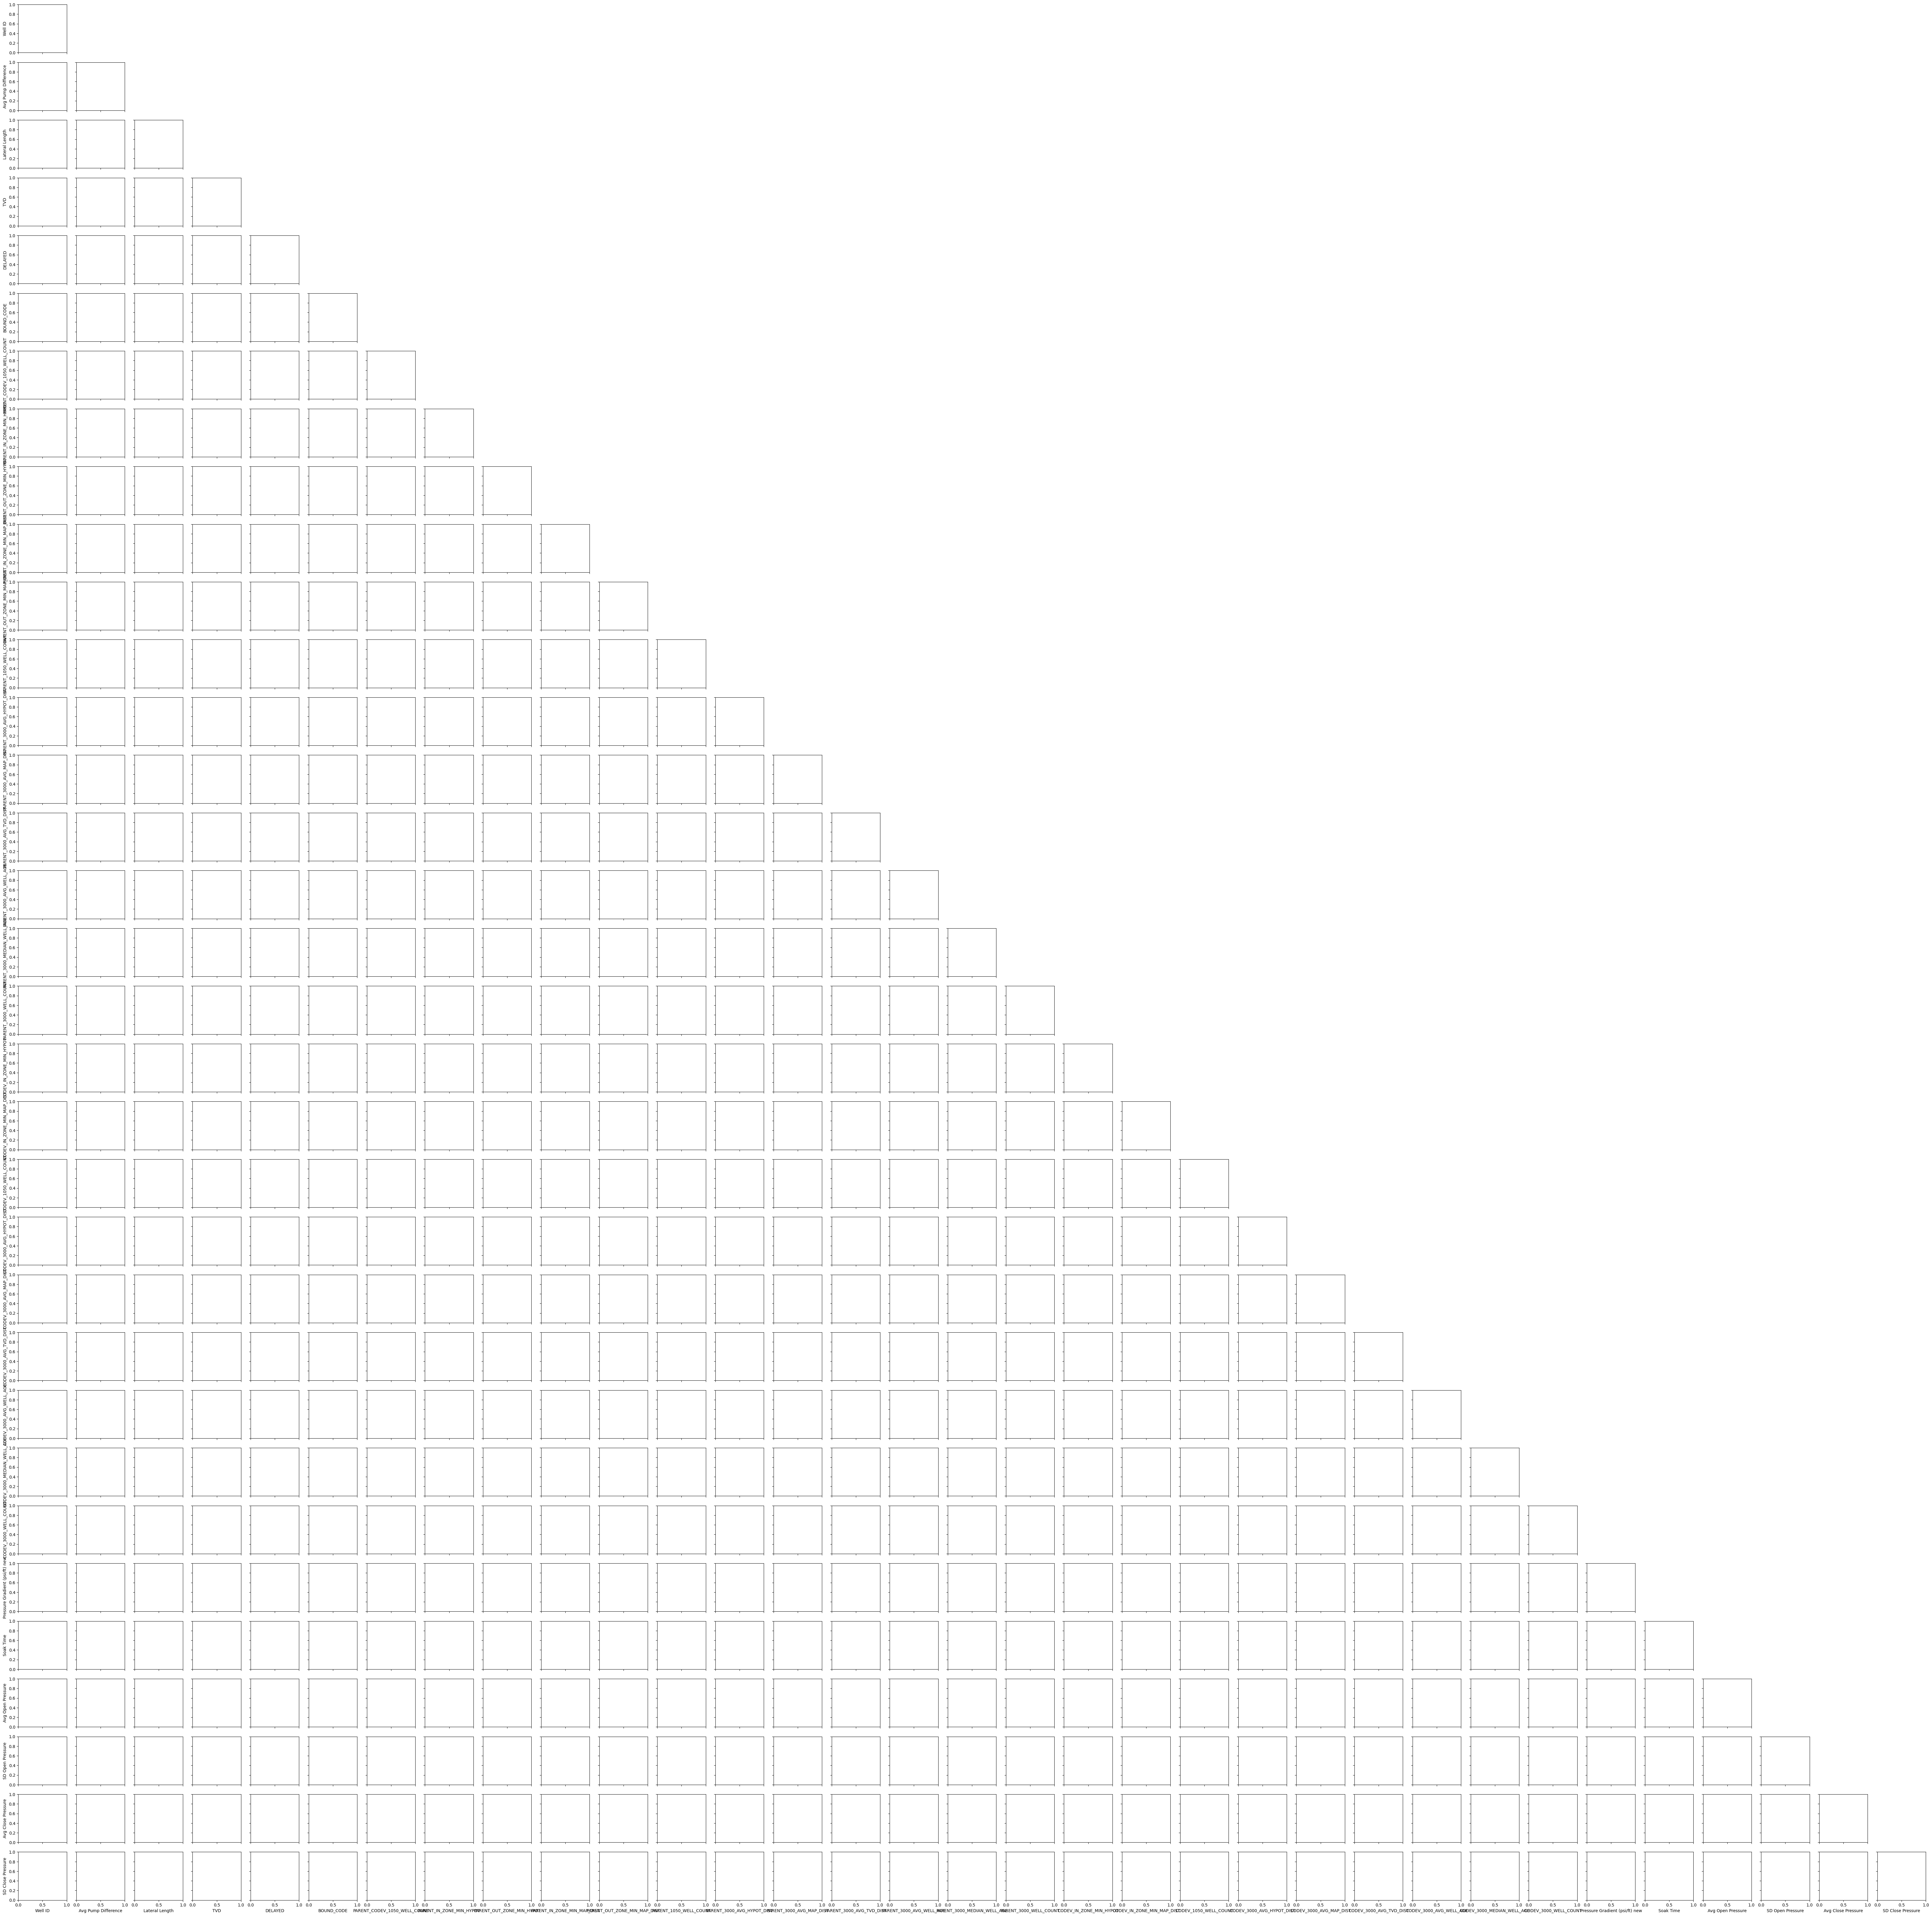

In [ ]:
sns.pairplot(df.iloc[:,:], hue="Imputed", plot_kws={'alpha':0.15,'s':20}, palette = 'gnuplot', corner=True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.6, wspace=0.1, hspace=0.2)

**Remerge the datasets**

In [ ]:
# Concatenate the DataFrames along the columns (axis=1)
merged_df = pd.concat([categorical_df, numerical_df], axis=1)

# Print or use the merged DataFrame as needed
merged_df.describe()

# Save the updated dataframe to a new CSV file
df.to_csv('/content/HackathonData2024_updated.csv', index=False)

*** Remove strong colinear features ***

Considerations:

- Hypotenus distance v. Map distance


> Because the hypotenuse distance includes the depth as well as the map distance, we felt it was a better indication of distance than just the map distnace. for this reason we elected to keep the hypotenuse features over map featurese since they were both very colinear.


- Average age v. median age



> In cases where features describing median and 'average' age were highly colinear, we elected to maintain the median and forgoe the 'average' features.



Our Colinearity metric qualifier is 0.9 =< X

Features removed:

- PARENT_IN_ZONE_MIN_MAP_DIST
- PARENT_OUT_ZONE_MIN_MAP_DIST
- PARENT_3000_AVG_WELL_AGE
- CODEV_IN_ZONE_MIN_MAP_DIST
- CODEV_3000_AVG_MAP_DIST
- CODEV_3000_AVG_WELL_AGE


Citation:
Feature Selection for Subsurface Data Analytics in Python
